# WeatherPy

For Part I, you must include a written description of three observable trends based on the data.
----

ANALYSIS: 
* According to the data, there appears to be a correlation between the latitude and temperature. (The closer you are to the equator, the higher the temperature. )
* My "raw_data" reports that "Altadena" is the hottest city with 95 Degrees (F). 
* Based on the Linear Regression data, there is no good correlation between the Latitude and Wind-Speed/Humidity/Cloudiness. 


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

**Websites used for this homework: 

* Geo Coordinate System: https://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
* Starter code for Citipy: https://pypi.org/project/citipy/
* citipy documentation: https://libraries.io/pypi/citipy
* OpenWeather: https://openweathermap.org/api


    

In [1]:
# DEPENDENCIES 


# Import API Keys 
# Install citipy 

from api_keys import (weather_api_key, g_key)
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import gmaps
import time
from scipy.stats import linregress
from pprint import pprint






# Read Output File for Cities (CSV)

output_data_file  = pd.read_csv("../output_data/cities.csv")
output_data_file 



,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [3]:
# Ranges: latitudes and longitudes ("Lat" & "Lng")

# NOTE, referenced ranges/coordinates info: "Geo Coordinate System"
# Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
# Longitude values are measured relative to the prime meridian. 
# They range from -180° when traveling west to 180° when traveling east. 


lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# set up lists to hold reponse info (Lats/Lng & cities)

lat_lng = []
cities = []

# retrieve random lats/Lngs coordinates
random_lats = np.random.uniform(low=-90, high=90, size=1500)
random_lngs = np.random.uniform(low=-180, high=180, size=1500)
random_lats_lngs = zip(random_lats, random_lngs)

# using citipy to look up city names 

for lat_lng in random_lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the list of cities []
    if city not in cities:
        cities.append(city)

# city count (require min of 500)
len(cities)


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# create API URL 
# imperial units will disclose Fahrenheit

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)


In [6]:
# use openweathermap.org (review specs- similar to what we did in class) to view API response

# create response lists corresponding to the specs
city_name = []
country_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
date = []
wind_speed = []


# loop through the  list of cities [] created above
# exception will be noted below for cities not found

# counter for the call
count = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    
    # error handling to skip the error/not found cities
    try:

        # limit calls to 500 cities as required
        if (count > 500):
            break
        response = requests.get(f"{query_url}{city}").json()
        city_name.append(response["name"])
        country_name.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing data for {count} | {city}")
        count += 1

        
    except:
        print(f"{city} not found. Skipping... ")
        
    continue

Beginning Data Retrieval
-------------------------------
Processing data for 1 | busselton
babanusah not found. Skipping... 
Processing data for 2 | malmesbury
Processing data for 3 | chuy
Processing data for 4 | cabo san lucas
Processing data for 5 | punta arenas
Processing data for 6 | porto novo
Processing data for 7 | yellowknife
Processing data for 8 | cape town
Processing data for 9 | hithadhoo
Processing data for 10 | kiruna
Processing data for 11 | galveston
Processing data for 12 | codrington
Processing data for 13 | tabou
Processing data for 14 | kijang
illoqqortoormiut not found. Skipping... 
Processing data for 15 | henties bay
Processing data for 16 | ushuaia
Processing data for 17 | saint anthony
Processing data for 18 | kotelnikovo
paradwip not found. Skipping... 
Processing data for 19 | tupelo
Processing data for 20 | aquiraz
Processing data for 21 | albany
Processing data for 22 | cherskiy
Processing data for 23 | porto velho
Processing data for 24 | bluff
taolanaro n

Processing data for 220 | kerema
Processing data for 221 | salalah
Processing data for 222 | beira
Processing data for 223 | puerto madryn
Processing data for 224 | bambous virieux
Processing data for 225 | voh
Processing data for 226 | katsuura
Processing data for 227 | coihaique
Processing data for 228 | necochea
Processing data for 229 | fuxin
Processing data for 230 | quelimane
Processing data for 231 | ancud
Processing data for 232 | ballina
Processing data for 233 | pevek
satitoa not found. Skipping... 
Processing data for 234 | matara
Processing data for 235 | ornskoldsvik
Processing data for 236 | omboue
Processing data for 237 | puqi
Processing data for 238 | bengkulu
Processing data for 239 | stratford-upon-avon
Processing data for 240 | cidreira
Processing data for 241 | trinidad
Processing data for 242 | shelburne
Processing data for 243 | lewistown
Processing data for 244 | rio grande
Processing data for 245 | faanui
louisbourg not found. Skipping... 
Processing data for 2

Processing data for 430 | megion
fort saint john not found. Skipping... 
Processing data for 431 | tilichiki
Processing data for 432 | jalu
Processing data for 433 | chamrajnagar
Processing data for 434 | lata
Processing data for 435 | kalmunai
Processing data for 436 | zavyalovo
Processing data for 437 | houma
talawdi not found. Skipping... 
Processing data for 438 | slobidka
Processing data for 439 | ahipara
Processing data for 440 | lang son
Processing data for 441 | kem
Processing data for 442 | dhidhdhoo
Processing data for 443 | synya
Processing data for 444 | puerto baquerizo moreno
Processing data for 445 | geraldton
Processing data for 446 | mora
Processing data for 447 | kahului
Processing data for 448 | goderich
Processing data for 449 | kamenka
Processing data for 450 | nivala
Processing data for 451 | andenes
Processing data for 452 | san roque
Processing data for 453 | srednekolymsk
Processing data for 454 | queenstown
Processing data for 455 | sompeta
Processing data for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create df

# dictionary
data = { 
    "City": city_name,
    "Country": country_name, 
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Date": date,
    "Wind Speed": wind_speed
}

raw_data = pd.DataFrame(data)
print(raw_data.count())
raw_data


City          500
Country       500
Latitude      500
Longitude     500
Max Temp      500
Humidity      500
Cloudiness    500
Date          500
Wind Speed    500
dtype: int64


,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Date,Wind Speed
0,Busselton,AU,-33.65,115.33,64.00,57,91,1602547055,8.66
1,Malmesbury,ZA,-33.46,18.73,55.99,87,40,1602547056,3.36
2,Chui,UY,-33.70,-53.46,53.82,91,46,1602547056,7.81
3,Cabo San Lucas,MX,22.89,-109.91,82.99,65,90,1602547056,6.93
4,Punta Arenas,CL,-53.15,-70.92,48.20,70,100,1602547056,25.28
...,...,...,...,...,...,...,...,...,...
495,Fort-Shevchenko,KZ,44.51,50.26,60.19,43,23,1602547118,21.97
496,Aykhal,RU,66.00,111.50,12.20,92,46,1602547118,4.47
497,Sobolevo,RU,54.43,31.90,49.95,94,73,1602547118,6.02
498,Tuatapere,NZ,-46.13,167.68,55.00,64,58,1602547118,4.00


In [8]:
# Save as CSV

raw_data.to_csv("../output_data/raw_data.csv", index=False)
raw_data = pd.read_csv("../output_data/raw_data.csv")

raw_data

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Date,Wind Speed
0,Busselton,AU,-33.65,115.33,64.00,57,91,1602547055,8.66
1,Malmesbury,ZA,-33.46,18.73,55.99,87,40,1602547056,3.36
2,Chui,UY,-33.70,-53.46,53.82,91,46,1602547056,7.81
3,Cabo San Lucas,MX,22.89,-109.91,82.99,65,90,1602547056,6.93
4,Punta Arenas,CL,-53.15,-70.92,48.20,70,100,1602547056,25.28
...,...,...,...,...,...,...,...,...,...
495,Fort-Shevchenko,KZ,44.51,50.26,60.19,43,23,1602547118,21.97
496,Aykhal,RU,66.00,111.50,12.20,92,46,1602547118,4.47
497,Sobolevo,RU,54.43,31.90,49.95,94,73,1602547118,6.02
498,Tuatapere,NZ,-46.13,167.68,55.00,64,58,1602547118,4.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:

# max_hum= raw_data["Humidity"].max
# max_hum

humidity_100plus= raw_data[raw_data["Humidity"]> 100]
len(humidity_100plus)

# results show that there are no cities that have humidity > 100%.

0

In [10]:
#  Get the indices of cities that have humidity over 100%.


#  ***there are no cities that have humidity > 100%.

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#  ***there are no cities that have humidity > 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

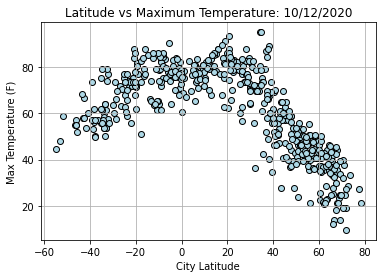

In [12]:
#  plt.scatter(x, y, s=area, c=colors, alpha=0.5)

x= raw_data["Latitude"]
y= raw_data["Max Temp"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Maximum Temperature: 10/12/2020")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("../output_data/HWfig01.png")

plt.show()

            


## Latitude vs. Humidity Plot

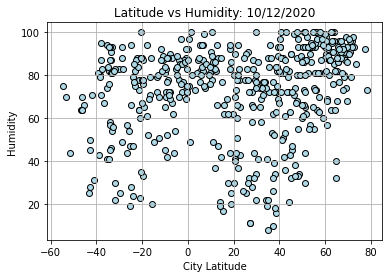

In [13]:
x= raw_data["Latitude"]
y= raw_data["Humidity"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Humidity: 10/12/2020")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")


plt.savefig("../output_data/hwfig02.png")

plt.show()



## Latitude vs. Cloudiness Plot

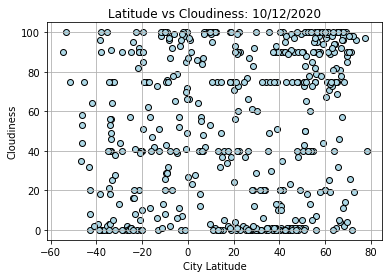

In [14]:
x= raw_data["Latitude"]
y= raw_data["Cloudiness"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Cloudiness: 10/12/2020")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")


plt.savefig("../output_data/hwfig03.png")

plt.show()


## Latitude vs. Wind Speed Plot

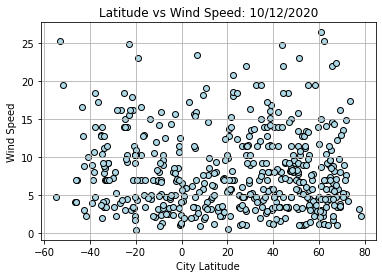

In [15]:
x= raw_data["Latitude"]
y= raw_data["Wind Speed"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Wind Speed: 10/12/2020")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")


plt.savefig("../output_data/hwfig04.png")

plt.show()


## Linear Regression

In [16]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# df for north & south hemispheres for Latitude Linear Regression 

north_hemisphere= raw_data[raw_data["Latitude"]> 0]
south_hemisphere= raw_data[raw_data["Latitude"]< 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7342428639861779


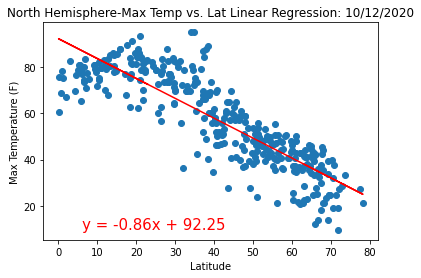

In [32]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('North Hemisphere-Max Temp vs. Lat Linear Regression: 10/12/2020')


plt.savefig("../output_data/hwfig05.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48752302323239194


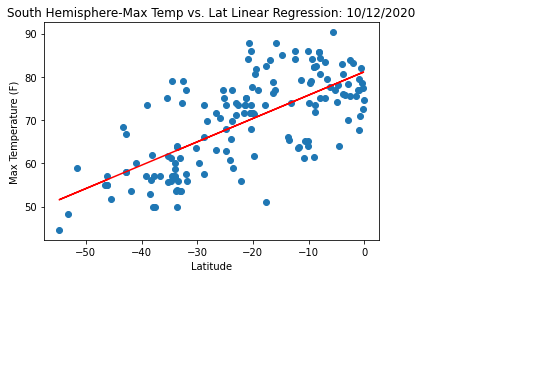

In [33]:

x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('South Hemisphere-Max Temp vs. Lat Linear Regression: 10/12/2020')


plt.savefig("../output_data/hwfig06.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06873064945671638


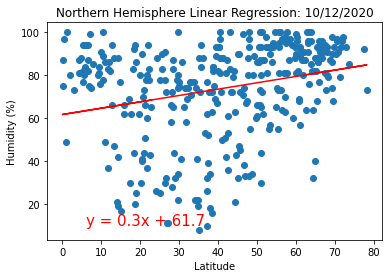

In [34]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Linear Regression: 10/12/2020')

plt.savefig("../output_data/hwfig07.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06356476722804466


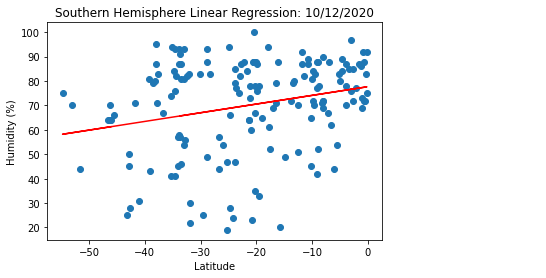

In [35]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Linear Regression: 10/12/2020')

plt.savefig("../output_data/hwfig08.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04553377176806325


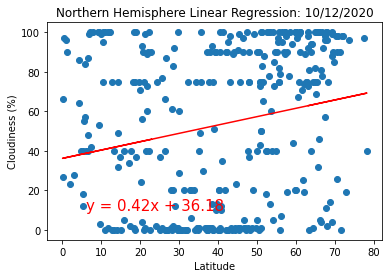

In [36]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Linear Regression: 10/12/2020')

plt.savefig("../output_data/hwfig09.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.042578086100783306


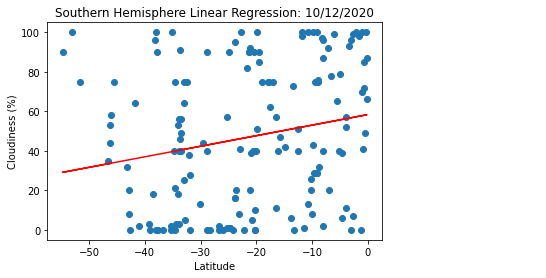

In [38]:

x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Linear Regression: 10/12/2020')

plt.savefig("../output_data/hwfig10.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 2.7506734338011e-05


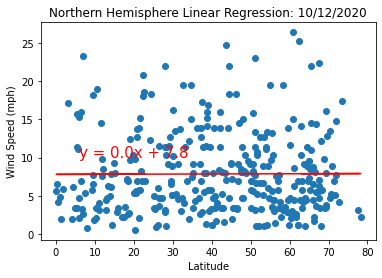

In [39]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Linear Regression: 10/12/2020')


plt.savefig("../output_data/hwfig11.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.039369990140527826


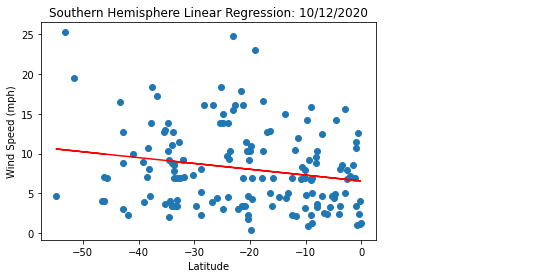

In [42]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Linear Regression: 10/12/2020')

plt.savefig("../output_data/hwfig12.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()



--------